# BOOMBIKES - DEMAND PREDICTION - MULTIPLE LINEAR REGRESSION 

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# STEPS INVOLVED IN BUILDING AND EVALUATING THE MODEL

-  Reading and understanding the data
-  Preparing the data for modelling I- converting datatypes, dropping redundant columns,etc.,
-  Data Visualization
-  Preparing the data for modelling II - Test, Train split
-  Training the model
-  Preparing the test data
-  Residual Anaysis
-  Predictions on the test set
-  Evaluations of the model  

# STEP1 : READING AND UNDERSTANDING THE DATA 

In [1]:
#Lets import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from the csv file
bs = pd.read_csv(r"C:\Users\Yoga\Downloads\day (1).csv")

In [3]:
#Display the first five rows of the data
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Lets understand the structure of our dataset
bs.shape

(730, 16)

In [5]:
#Lets check the datatypes and check if there are any null values in the dataset
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Lets check and understand the statistical summary of our numerical data
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# STEP2 : PREPARING THE DATA - PART I

ENCODING :
-  Preparing the categorial variables
-  Converting categorical variables into dummy variables

In [7]:
#From the data dictionary it is clear that some of the categorical variables are nominal in nature,so converting them to 
#"strings" so that they are not misinterpreted
bs['season'] = bs['season'].replace([1, 2, 3, 4],['spring','summer','fall','winter'])

In [8]:
#convert the type as category and check if the conversion is done
bs.season.astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
#Convert year column type to category, here 0 represents 2018; 1 represents 2019
bs.yr.astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [10]:
# Converting months in numerical values to strings as not to misterpret the numerical values
import calendar
bs['mnth'] = bs['mnth'].apply(lambda x: calendar.month_abbr[x]).astype('category')

In [11]:
bs['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [12]:
#Convert holiday column type to category, here 0 represents Not a holiday ; 1 represents holiday
bs.holiday.astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [13]:
# Converting weekday in numerical values to strings as not to misterpret the numerical values as per data dictionary
bs.weekday = bs.weekday.replace([0, 1, 2, 3, 4, 5, 6],['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon'])

In [14]:
bs.weekday.value_counts()

Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [15]:
# Converting workingday to category, where, 0 represents holiday/weekends and 1 represents workingday
bs.workingday.astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [16]:
# Converting weathersit for better understanding

In [17]:
bs.weathersit = bs.weathersit.map({1 : 'Clear', 2 : 'Misty', 3 : 'Snowy/Rainy'})

In [18]:
bs.weathersit.astype('category').value_counts()

Clear          463
Misty          246
Snowy/Rainy     21
Name: weathersit, dtype: int64

In [19]:
#Now that we have prepared our categorical variables - lets take a look at our numerical variables

In [20]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
#Convert date into datetime format
bs.dteday = bs.dteday.astype('datetime64')

In [22]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
#grouping categorical variables
bs_cat = bs.select_dtypes(exclude = ['int64','datetime64','float64'])

In [24]:
bs_cat

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Misty
1,spring,Jan,Tues,Misty
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear
...,...,...,...,...
725,spring,Dec,Sat,Misty
726,spring,Dec,Sun,Misty
727,spring,Dec,Mon,Misty
728,spring,Dec,Tues,Clear


# STEP3 : DATA VISUALIZATION 

Data Visualization is important to understand the data,its distribution, identify if there is correlation between variables, check if multicollinearity exists between the independent variables

Lets first visualize our numerical data one by one

In [25]:
bs.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

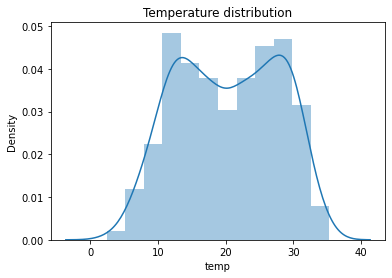

In [26]:
#temperature
sns.distplot(bs['temp']).set(title = 'Temperature distribution')
plt.show()

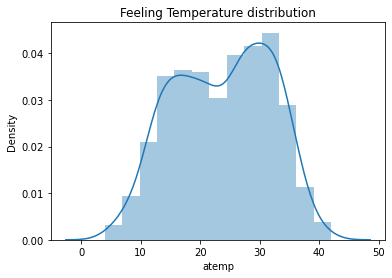

In [27]:
#feeling temperature
sns.distplot(bs['atemp']).set(title = 'Feeling Temperature distribution')
plt.show()

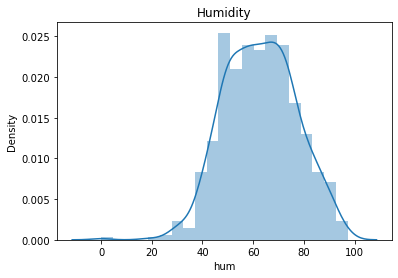

In [28]:
#humidity
sns.distplot(bs['hum']).set(title = 'Humidity')
plt.show()

In [29]:
bs.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

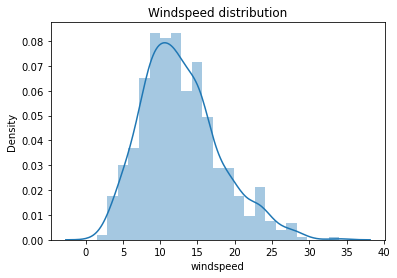

In [30]:
#windspeed
sns.distplot(bs['windspeed']).set(title = 'Windspeed distribution')
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

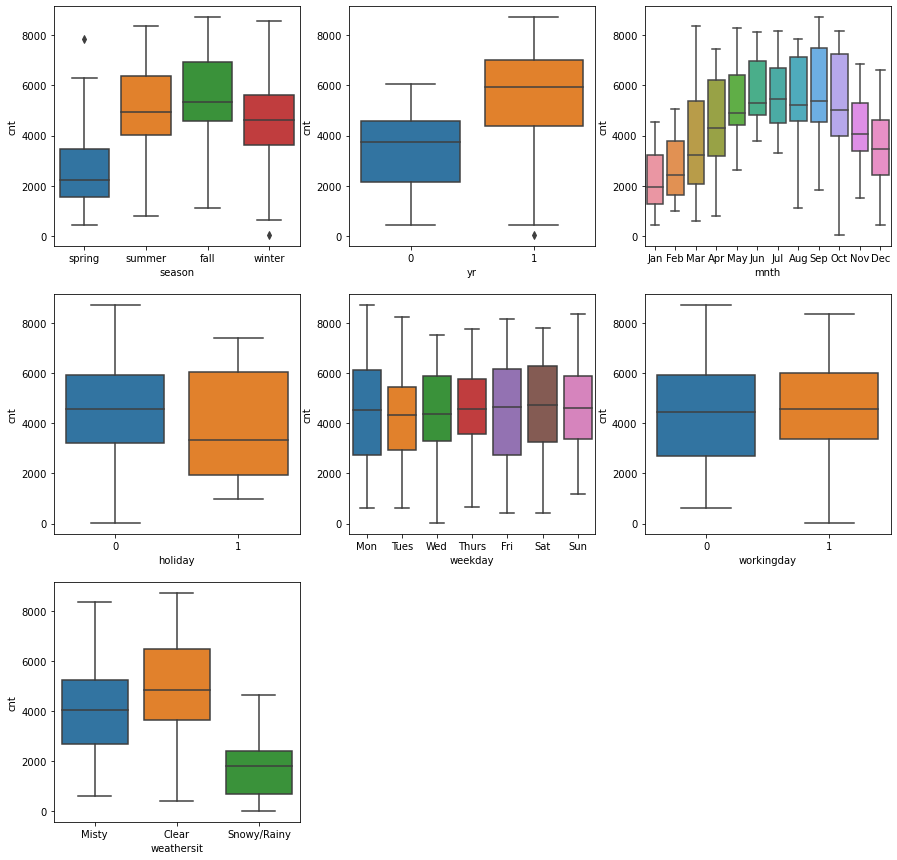

In [31]:
#Visualizing all categorical variables
#Lets create a subplot to understand the various categorical variables

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(3,3,3)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.boxplot(x = 'mnth', y = 'cnt', data = bs, order = months)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)

INFERENCE : 

The demand for bikes
-  is lowest in Spring season
-  increases year on year
-  is in increasing trend and is at peak for months May,June,July,September
-  is low during holidays
-  is lowest during Snowy/Rainy days and highest when the climate is clear/Partly cloudy

In [32]:
#Now lets visualize the numerical variables
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
bs.info() #all our numerical variables are of dtype 'float' except for our output variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(1), datetime64

In [34]:
#Lets convert our dependent variables to 'float'type for better visualizing them 
cols = ['casual','registered','cnt']
for var in cols:
    bs[cols] = bs[cols].astype('float64')

In [35]:
num_list = bs.select_dtypes(include = 'float64')

In [36]:
num_list

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


Now lets visualize our numeric values


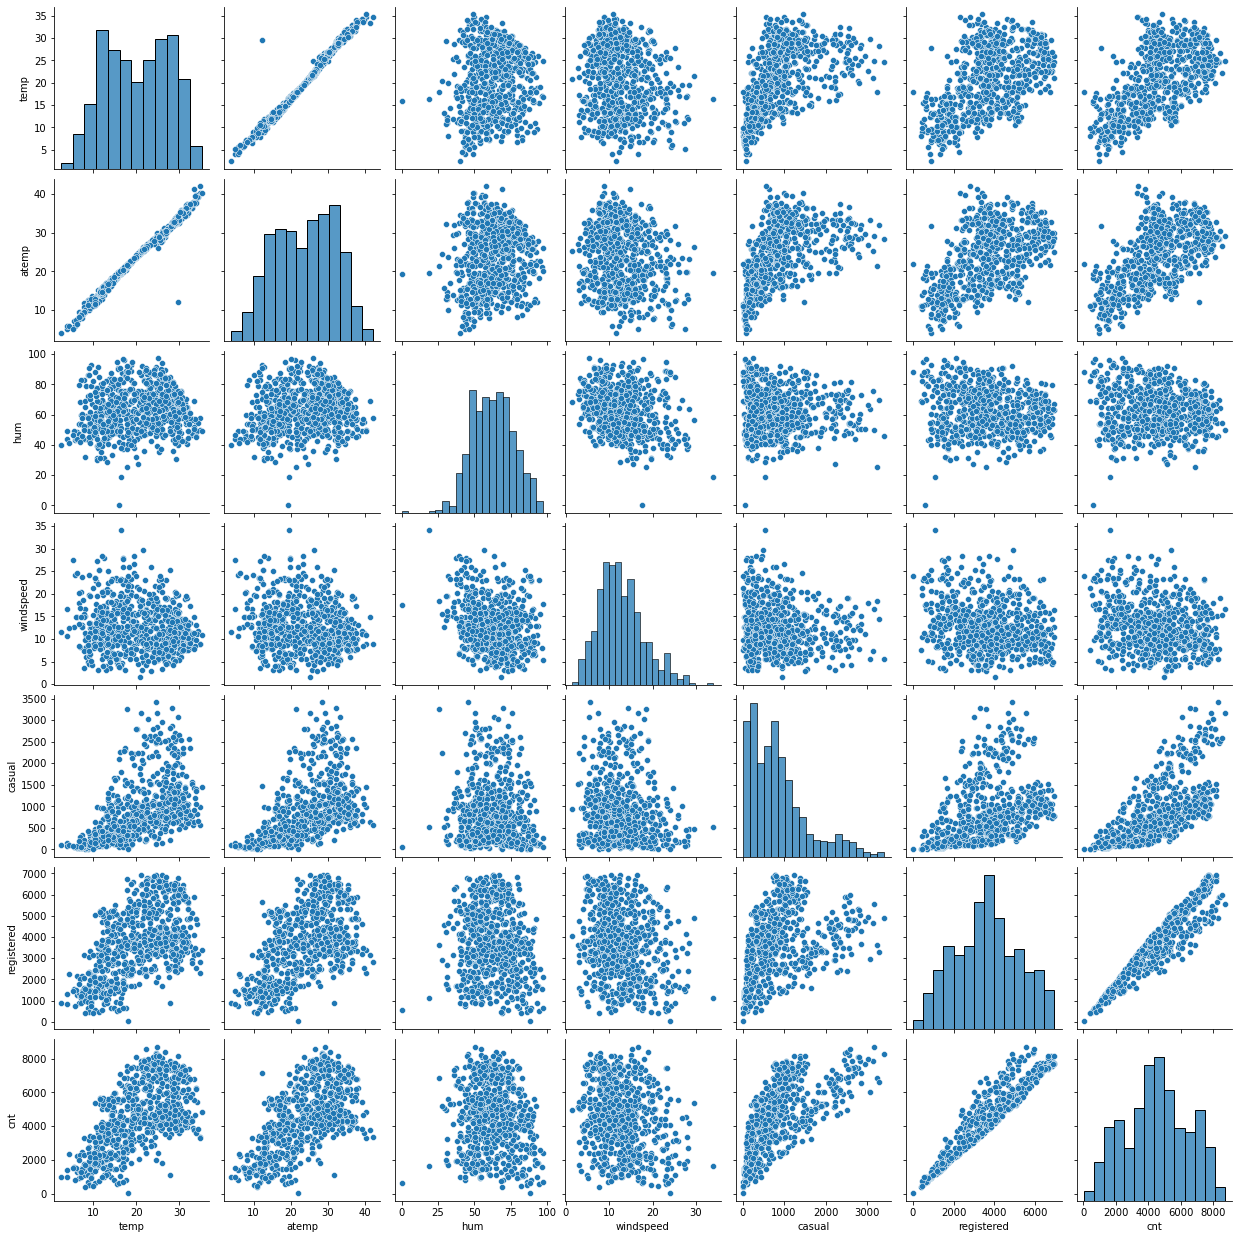

In [37]:
#Lets plot a pairplot to visualize our numeric values
sns.pairplot(num_list)
plt.show()

INFERENCES:
-  We can see that there exists a very strong linearity between 'temp' and 'atemp'
-  The variables 'registered','casual' and 'cnt' are also highly correlated

Now lets plot a heatmap and correlation matrix to understand the values of correlation


In [38]:
#Correlation matrix
cor_mat = num_list.corr()
cor_mat

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


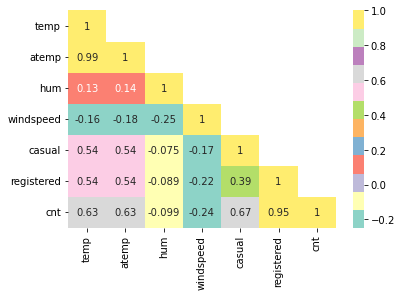

In [39]:
#heatmap
mask = np.triu(np.ones_like(cor_mat))
np.fill_diagonal(mask, False)
sns.heatmap(cor_mat,cmap = 'Set3',annot = True, mask = mask)
plt.show()

INFERENCE:

-  It is now evident that the variables 'registered','cnt' are highly correlated as 'cnt' is the sum total of 'registered' and 'casual'
-  Independent variables 'atemp' and 'temp' are highly correlated
-  The variable 'windspeed' is negatively correlated with count and hence it is evident that count decreases on windy days

In [40]:
#dropping the column 'atemp' as its highly correlated
bs.drop('atemp',axis = 1,inplace = True)

In [41]:
#dropping the columns casual and registered as they are highly correlated with cnt
bs.drop(['casual','registered'],axis =1,inplace= True)

In [42]:
#Lets drop variables 'instant' and 'dteday' as they will not be useful for our modelling
bs.drop(['instant','dteday'],axis =1, inplace = True)

In [43]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tues,0,Misty,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600.0


## DATA PREPARATION FOR CREATING DUMMY VARIABLES

In [44]:
bs.dtypes

season          object
yr               int64
mnth          category
holiday          int64
weekday         object
workingday       int64
weathersit      object
temp           float64
hum            float64
windspeed      float64
cnt            float64
dtype: object

In [45]:
bs_cat = bs.select_dtypes(include = ['object','category'])

Lets convert our categorical variables with multiple levels(non boolean) to integers. We can do this by creating dummy variables

In [46]:
bs_dummy = pd.get_dummies(bs_cat,drop_first = True)
bs_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Snowy/Rainy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Now lets append this to our original dataframe
bs.drop(bs_cat,axis=1,inplace = True)

In [48]:
bs = pd.concat([bs,bs_dummy],axis = 1)

In [49]:
bs.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Snowy/Rainy
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have prepared our data, lets start building our model

# STEP4 : SPLITTING THE DATASET INTO TEST TRAIN

__Lets split our dataset into train & test data we are using 70% of our dataset to train our model and 30% data to test our model__

In [50]:
import sklearn
from sklearn.model_selection import train_test_split

In [51]:
df_train,df_test = train_test_split(bs,train_size=0.7,random_state = 100)

In [52]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


__RESCALING OUR NUMERIC VARIABLES__

Now that we have split our data, lets rescale the numeric variables to have a comparable scale. Cause if we dont have comparabale scales then some coefficients as obtained by fitting the regression model might be very large or small as compared to other coefficients

So we use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [53]:
#Import required libraries for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [54]:
bs.dtypes

yr                          int64
holiday                     int64
workingday                  int64
temp                      float64
hum                       float64
windspeed                 float64
cnt                       float64
season_spring               uint8
season_summer               uint8
season_winter               uint8
mnth_Aug                    uint8
mnth_Dec                    uint8
mnth_Feb                    uint8
mnth_Jan                    uint8
mnth_Jul                    uint8
mnth_Jun                    uint8
mnth_Mar                    uint8
mnth_May                    uint8
mnth_Nov                    uint8
mnth_Oct                    uint8
mnth_Sep                    uint8
weekday_Mon                 uint8
weekday_Sat                 uint8
weekday_Sun                 uint8
weekday_Thurs               uint8
weekday_Tues                uint8
weekday_Wed                 uint8
weathersit_Misty            uint8
weathersit_Snowy/Rainy      uint8
dtype: object

In [55]:
#Create an object for instantition
scaler = MinMaxScaler()

In [56]:
#Create a subset with only numerical variables excluding the dummy varaibles and binary variables
nums = ['temp','hum','windspeed','cnt']

In [57]:
#Rescale the numerical variables
df_train[nums] = scaler.fit_transform(df_train[nums])

In [58]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Snowy/Rainy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
#Lets check if it has rescaled
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Snowy/Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Now that we have split our dataset into train and test, lets define our Xtrain and ytrain__

In [60]:
#Defining X_train and y_train
y_train = df_train['cnt']
X_train = df_train.loc[:,df_train.columns!='cnt']

# STEP 5 : BUILDING AND TRAINING THE MODEL

__Lets start with all variables and keep removing one by one to see if the model is improving__

In [61]:
#Import the required libraries
import statsmodels.api as sm

In [62]:
#Add constant 
X_train_sm = sm.add_constant(X_train)

#Build model
lr = sm.OLS(y_train,X_train_sm)

#Fit model
lr_model = lr.fit()

#View stats
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.00e-181
Time:                        00:50:54   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2409      0.036      6.786      0.000       0.171       0.311
yr                         0.2324      0.008     28.819      0.000       0.217       0.248
holiday                    0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                 0.0929      0.012      7.707      0.000       0.069       0.117
temp                       0.4454      0.046      9.628      0.000       0.354       0.536
hum                       -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                 -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring             -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer              0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter              0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                   0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                  -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                  -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                  -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul                  -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun                   0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                   0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                   0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                  -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                   0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sep                   0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                0.0978      0.014      7.231      0.000       0.071       0.124
weekday_Sat               -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sun                0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thurs             -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tues               0.0435      0.014      3.173      0.002       0.017       0.070
weekday_Wed               -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_Misty          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_Snowy/Rainy    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus)

The adjusted r-squared value shows a good value of 84.4%.Lets try to build model by reducing the features and exclude features which are not relevant to predict target variable

__MODEL BUILDING USING RFE(15 features)__

Lets build the model using recursive feature elimination to select the features. Lets select 15 features

In [63]:
#Import RFE libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [64]:
#Lets build RFE with 15 features
LiR = LinearRegression()
rfe = RFE(LiR, n_features_to_select=15, step =1)

#Lets fit wi th 15 features
rfe.fit(X_train,y_train)

#print the summary
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 12 14  5  2 11  1  1 13 10  9
  7  8  1  1]


In [65]:
#Lets now check the summary using statsmodel
#Create a subset of the features that were selected by RFE model
rfe_sel = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_sel]

#Adding a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

#Fit the model
lr1 = sm.OLS(y_train,X_train_rfe).fit()

#Lets view the summary
print(lr1.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          4.22e-191
Time:                        00:50:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

__INFERENCE__:

The r-squared value does not seem to budge. Its a good indication to move ahead with the selected features using RFE

Lets check if there is multicollinearity with the features using VIF

In [66]:
#VIF - import required librries

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_Misty,weathersit_Snowy/Rainy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


In [68]:
#First lets remove the const column before we calculate VIF

rmc = X_train_rfe.drop('const', axis = 1)
rmc

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_Misty,weathersit_Snowy/Rainy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,1,0


In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
#1.create dataframe
vif = pd.DataFrame()

#2.create a column 'features' in the vif dataframe
vif['features'] = rmc.columns

#3.create another column vif to know the corresponding value of VIF of the feature
vif['VIF'] = [variance_inflation_factor(rmc.values,i) for i in range(rmc.shape[1])]

#4.Round of two places to VIF
vif['VIF'] = round(vif['VIF'],2)

#5.Sort the values of the VIF in descending order for better interpretation
vif = vif.sort_values(by = 'VIF',ascending = False)

print(vif)

                  features    VIF
4                      hum  29.37
3                     temp  17.78
2               workingday   5.31
5                windspeed   4.73
6            season_spring   4.53
8            season_winter   3.46
7            season_summer   2.85
13        weathersit_Misty   2.29
0                       yr   2.09
12             weekday_Mon   1.98
9                 mnth_Jan   1.67
10                mnth_Jul   1.59
11                mnth_Sep   1.39
14  weathersit_Snowy/Rainy   1.24
1                  holiday   1.18


__Lets build the model using RFE for 10 variables__

In [70]:
from sklearn.feature_selection import RFE

#Create an object for RFE and select 7 features
LiR_1 = LinearRegression()
rfe_1 = RFE(LiR_1,n_features_to_select = 10)

In [71]:
#Fit RFE into Xtrain and ytrain
rfe_1.fit(X_train,y_train)
print(rfe_1.support_)
print(rfe_1.ranking_)

[ True  True False  True  True  True False  True  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  5  1  1  1  2  1  1 11  8  9  6  1 17 19 10  7 16  1  4 18 15 14
 12 13  3  1]


In [72]:
#Subset the RFE selected columns to X_train
rfe_sel1 = X_train.columns[rfe_1.support_]
X_train_rfe1 = X_train[rfe_sel1]

In [73]:
#Now check the summary using statsmodel
X_train_rfe1.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_Jul,mnth_Sep,weathersit_Snowy/Rainy
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


In [74]:
#add constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [75]:
#Fit the model
lr2 = sm.OLS(y_train,X_train_rfe1).fit()

In [76]:
#View the summary stats
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.79e-186
Time:                        00:51:06   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2682      0.026     10.292      0.000       0.217       0.319
yr                         0.2259      0.008     27.118      0.000       0.210       0.242
holiday                   -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                       0.6200      0.023     27.492      0.000       0.576       0.664
hum                       -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed                 -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer              0.0800      0.011      7.281      0.000       0.058       0.102
season_winter              0.1390      0.011     12.903      0.000       0.118       0.160
mnth_Jul                  -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_Sep                   0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_Snowy/Rainy    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Lets calculate the VIF
#Remove the constant that we have added in the statsmodel previously

rmc1 = X_train_rfe1.drop('const',axis =1)

vif = pd.DataFrame()

#2.create a column 'features' in the vif dataframe
vif['features'] = rmc1.columns

#3.create another column vif to know the corresponding value of VIF of the feature
vif['VIF'] = [variance_inflation_factor(rmc1.values,i) for i in range(rmc1.shape[1])]

#4.Round of two places to VIF
vif['VIF'] = round(vif['VIF'],2)

#5.Sort the values of the VIF in descending order for better interpretation
vif = vif.sort_values(by = 'VIF',ascending = False)

print(vif)




                 features    VIF
3                     hum  10.29
2                    temp   9.29
4               windspeed   3.54
0                      yr   2.02
5           season_summer   1.76
6           season_winter   1.68
7                mnth_Jul   1.55
8                mnth_Sep   1.29
9  weathersit_Snowy/Rainy   1.09
1                 holiday   1.04


__INFERENCE__

From the model summary above, 

- All the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. 
- But notice that there are a few variables which have VIF > 5.

So, lets try removing 'hum' first and see how other variables VIF change

In [78]:
X_train_rfe1.drop('hum',axis=1,inplace = True)

In [101]:
X_train_rfe1.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Jul,mnth_Sep,weathersit_Snowy/Rainy
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0


In [80]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [81]:
X_train_rfe1.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Jul,mnth_Sep,weathersit_Snowy/Rainy
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0


In [82]:
#Fitting the model with 10 variables
lr3 = sm.OLS(y_train,X_train_rfe1).fit()

#View summary stats
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          4.42e-171
Time:                        00:51:08   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0840      0.018      4.794      0.000       0.050       0.118
yr                         0.2329      0.009     26.061      0.000       0.215       0.251
holiday                   -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                       0.5854      0.024     24.438      0.000       0.538       0.632
windspeed                 -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer              0.0750      0.012      6.346      0.000       0.052       0.098
season_winter              0.1228      0.011     10.731      0.000       0.100       0.145
mnth_Jul                  -0.0313      0.020     -1.578      0.115      -0.070       0.008
mnth_Sep                   0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_Snowy/Rainy    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model seems to be good at 80.1% accuaracy, Lets check the VIF

In [83]:
rmc2 = X_train_rfe1.drop('const',axis = 1)

In [84]:
vif = pd.DataFrame()

#2.create a column 'features' in the vif dataframe
vif['features'] = rmc2.columns

#3.create another column vif to know the corresponding value of VIF of the feature
vif['VIF'] = [variance_inflation_factor(rmc2.values,i) for i in range(rmc2.shape[1])]

#4.Round of two places to VIF
vif['VIF'] = round(vif['VIF'],2)

#5.Sort the values of the VIF in descending order for better interpretation
vif = vif.sort_values(by = 'VIF',ascending = False)

print(vif)


                 features   VIF
2                    temp  4.96
3               windspeed  3.01
0                      yr  2.00
4           season_summer  1.75
6                mnth_Jul  1.51
5           season_winter  1.43
7                mnth_Sep  1.28
8  weathersit_Snowy/Rainy  1.06
1                 holiday  1.03


__INFERENCE__


- All VIF values are <5
- p-values also are less than 0.05
- adjusted r-squared value has dropped from 84.5% with 28 variables to 80.1% with 9 variables

__*So lets proceed with this model*__

# STEP 6 : RESIDUAL ANALYSIS

In [85]:
#Lets do residual analysis before we test the model on test data
y_train_cnt = lr3.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

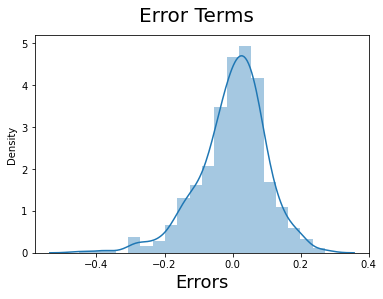

In [86]:
# Lets plot a histogram with error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)   

Assuming error terms are normally distributed, lets now make predictions on the test data

In [87]:
#Lets start with scaling the X_test
nums

['temp', 'hum', 'windspeed', 'cnt']

In [88]:
df_test[nums] = scaler.transform(df_test[nums])

In [89]:
#Split df_test into X_test and y_test after scaling
y_test = df_test['cnt']
X_test = df_test.loc[:,df_test.columns!="cnt"]

In [90]:
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 28)


In [91]:
rmc3 = rmc2.columns
rmc3

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Snowy/Rainy'],
      dtype='object')

In [92]:
X_test_rfe = X_test[rmc3]

In [93]:
#add constant to the X_test
X_test_rfe = sm.add_constant(X_test_rfe)

In [94]:
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   220 non-null    float64
 1   yr                      220 non-null    int64  
 2   holiday                 220 non-null    int64  
 3   temp                    220 non-null    float64
 4   windspeed               220 non-null    float64
 5   season_summer           220 non-null    uint8  
 6   season_winter           220 non-null    uint8  
 7   mnth_Jul                220 non-null    uint8  
 8   mnth_Sep                220 non-null    uint8  
 9   weathersit_Snowy/Rainy  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


# STEP7 : PREDICTING Y VALUES 

In [95]:
#Making predictions
y_pred = lr3.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

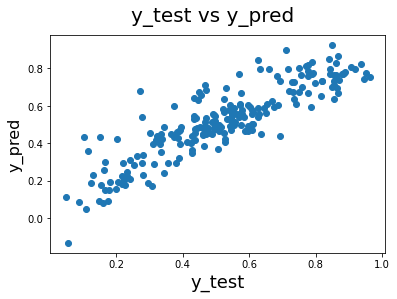

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, its evident that the model is doing good on the test set as well

# STEP8: EVALUATING THE MODEL

In [97]:
#Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

from sklearn.metrics import r2_score

In [98]:
r2_score(y_test,y_pred)

0.7717629996668943

__Thus, for the model with 10 variables, the r-squared on training and test data is about 80.5% and 77.18% respectively. The adjusted r-squared on the train set is about is about 80.1%__

In [99]:
#Finally lets plot a correlation map to see the final predictor variables

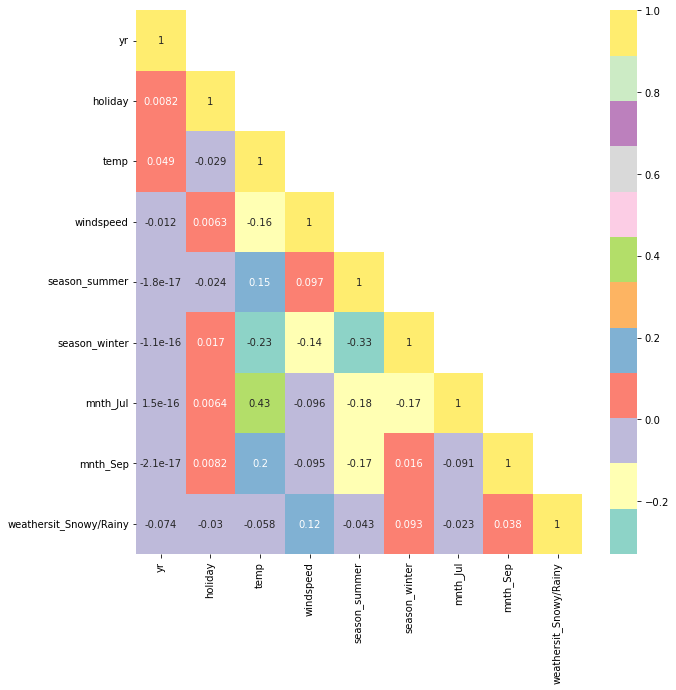

In [100]:
fig = plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(bs[rmc3].corr()))
np.fill_diagonal(mask, False)
sns.heatmap(bs[rmc3].corr(),cmap = 'Set3',annot = True, mask = mask)
plt.show()

__Final Conclusion:__

-  The model has low correlation values
-  The final module was built with 9 variables('yr', 'holiday', 'temp', 'windspeed',season_summer','season_winter','weathersit_Snowy/Rainy',mnth_Jul,mnth_Sep)   
-  The variable ‘temp’ has a coefficient of ‘0.5854' representing unit increase in target variable,increases the shared bikes numbers by 0.5854 units 
-  The variable ‘yr’ has a coefficient of ‘0.2329’ representing unit increase in target variable, increases the shared bikes numbers by 0.2329 units 
-  The variable ‘weathersit_Snowy/Rainy’ has a coefficient of ‘0.2524’ representing unit increase in target variable, decreases the shared bikes numbers by 0.2524 units 
-  The variable ‘holiday’ has a coefficient of ‘0.0875’ representing unit increase in target variable, decreases the shared bikes numbers by 0.0875 units
